<a href="https://colab.research.google.com/github/twyeh/solid-state-physics/blob/main/Kronig_Penney_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

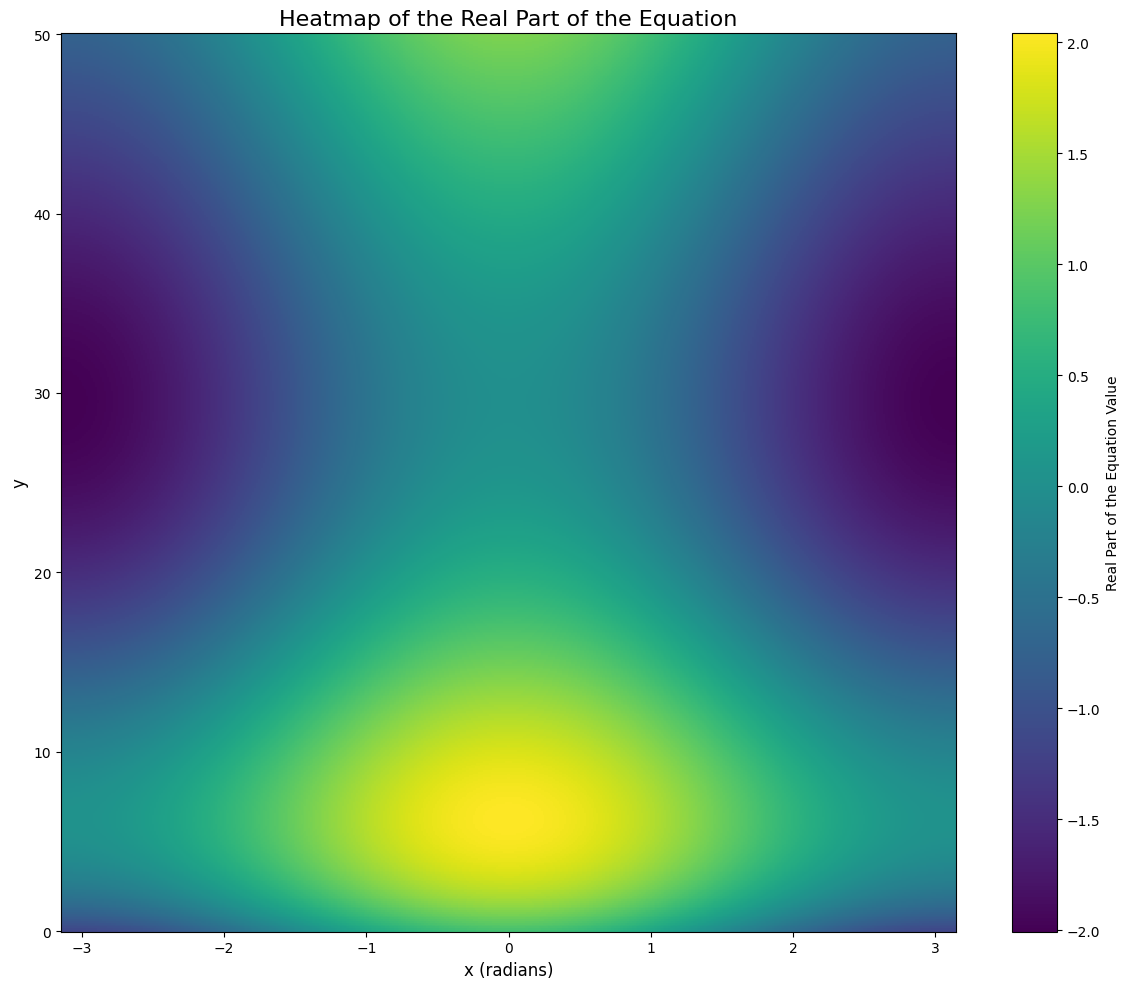

In [4]:
import matplotlib.pyplot as plt

# Plotting the heatmap of the real part
fig, ax = plt.subplots(figsize=(12, 10))

c = ax.pcolormesh(X, Y, Z_real, cmap='viridis', shading='auto')

fig.colorbar(c, ax=ax, label='Real Part of the Equation Value')
ax.set_title('Heatmap of the Real Part of the Equation', fontsize=16)
ax.set_xlabel('x (radians)', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_aspect('auto')
plt.tight_layout()
plt.show()

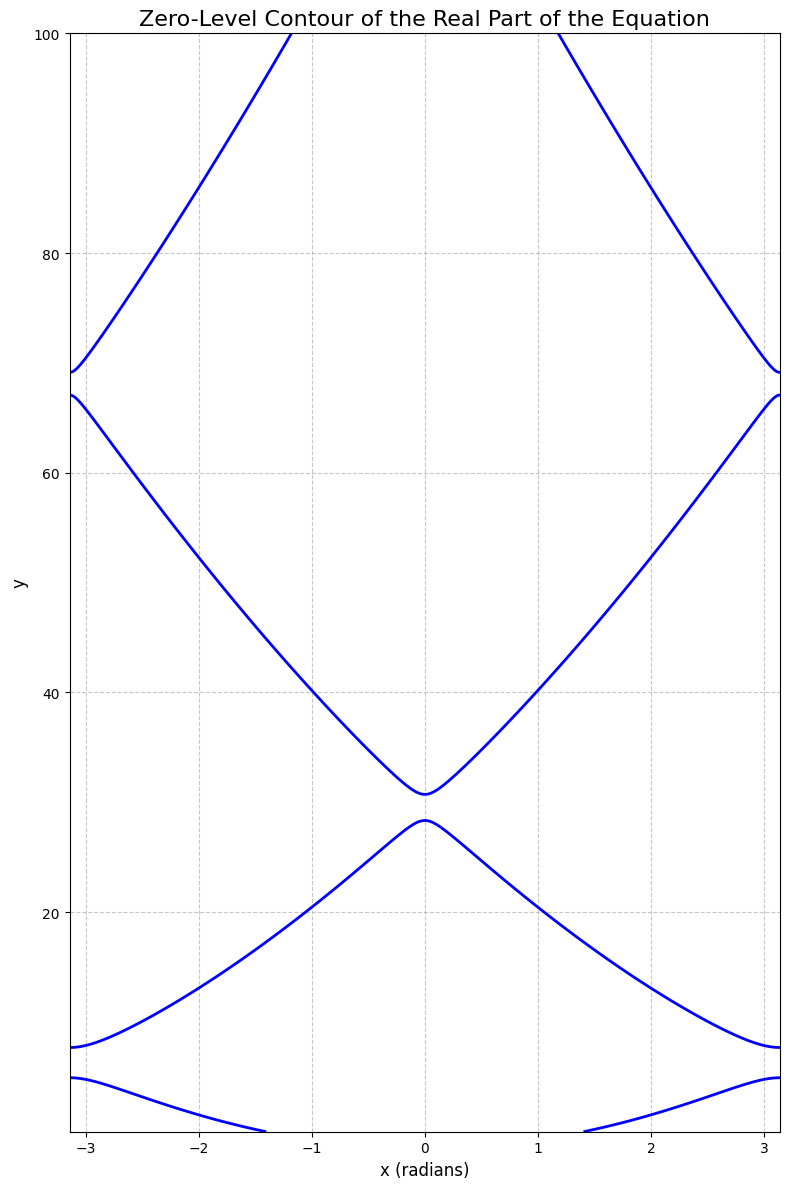

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constants
a = 1.0
b = 0.1
c = 0.9

# Define the ranges
x_min, x_max = -np.pi, np.pi
y_min, y_max = 0.01, 100

# Create a meshgrid with higher resolution for better contour detail
X, Y = np.meshgrid(np.linspace(x_min, x_max, 500),
                   np.linspace(y_min, y_max, 500))

def equation_func_robust(x_grid, y_grid, a, b, c):
    """
    Calculates the complex value of the equation for given x and y grids.
    Handles the indeterminate form at y=10 by explicitly setting the problematic term to 0.
    """
    term1_val = np.cos(x_grid * a)

    # Identify points where y is close to 10 (potential singularity)
    is_y_10 = np.isclose(y_grid, 10.0)

    # Initialize components for results that are not at y=10
    cos_b_val_not_10 = np.zeros_like(y_grid, dtype=np.complex128)
    cos_c_val_not_10 = np.zeros_like(y_grid, dtype=np.complex128)
    sin_b_val_not_10 = np.zeros_like(y_grid, dtype=np.complex128)
    sin_c_val_not_10 = np.zeros_like(y_grid, dtype=np.complex128)
    third_term_val_not_10 = np.zeros_like(y_grid, dtype=np.complex128)

    # Mask for points where y is NOT close to 10
    mask_not_10 = ~is_y_10

    # Perform calculations for points not at y=10
    if np.any(mask_not_10):
        y_masked = y_grid[mask_not_10]

        sqrt_arg_y_minus_10_masked = 2 * (y_masked - 10)
        sqrt_2_y_minus_10_masked = np.sqrt(np.complex128(sqrt_arg_y_minus_10_masked))
        sqrt_2_y_masked = np.sqrt(2 * y_masked)

        cos_b_val_not_10[mask_not_10] = np.cos(sqrt_2_y_minus_10_masked * b)
        cos_c_val_not_10[mask_not_10] = np.cos(sqrt_2_y_masked * c)
        sin_b_val_not_10[mask_not_10] = np.sin(sqrt_2_y_minus_10_masked * b)
        sin_c_val_not_10[mask_not_10] = np.sin(sqrt_2_y_masked * c)

        # Denominator for the fraction term
        sqrt_arg_denom_masked = y_masked * (y_masked - 10)
        denominator_masked = 4 * np.sqrt(np.complex128(sqrt_arg_denom_masked))
        numerator_fraction_masked = (2 * y_masked + 2 * (y_masked - 10))

        # Calculate fraction term where denominator is not zero
        # For this specific equation, the problematic term (fraction * sin_b * sin_c) becomes 0 when sin_b is 0
        # which happens at y=10. So explicit handling is needed.
        fraction_term_masked = np.divide(numerator_fraction_masked, denominator_masked,
                                         out=np.zeros_like(numerator_fraction_masked, dtype=np.complex128),
                                         where=denominator_masked!=0)

        third_term_val_not_10[mask_not_10] = fraction_term_masked * sin_b_val_not_10[mask_not_10] * sin_c_val_not_10[mask_not_10]

    # Initialize full terms, to be populated from both masked and y=10 cases
    cos_b_val = np.zeros_like(y_grid, dtype=np.complex128)
    cos_c_val = np.zeros_like(y_grid, dtype=np.complex128)
    third_term_val = np.zeros_like(y_grid, dtype=np.complex128)

    # Populate from calculations for y != 10
    cos_b_val[mask_not_10] = cos_b_val_not_10[mask_not_10]
    cos_c_val[mask_not_10] = cos_c_val_not_10[mask_not_10]
    third_term_val[mask_not_10] = third_term_val_not_10[mask_not_10]

    # Handle points where y is close to 10
    if np.any(is_y_10):
        # At y=10, sqrt(2*(y-10)) = 0, so sin(0*b) = 0.
        # This makes the entire third term (fraction_term * sin_b_val * sin_c_val) equal to 0.
        # The cos(0*b) term becomes 1.
        sqrt_2_y_at_10 = np.sqrt(2 * y_grid[is_y_10])
        cos_b_val[is_y_10] = 1.0  # cos(0)
        cos_c_val[is_y_10] = np.cos(sqrt_2_y_at_10 * c)
        third_term_val[is_y_10] = 0.0  # because sin(0) = 0

    # Combine all terms to get the final complex value of the equation
    Z_complex = term1_val - (cos_b_val * cos_c_val) - third_term_val
    return Z_complex

# Calculate the complex values of the equation
Z_complex = equation_func_robust(X, Y, a, b, c)

# Extract the real part for contour plotting
Z_real = np.real(Z_complex)

# Plotting
fig, ax = plt.subplots(figsize=(8, 12))

# Plot the zero-level contour of the real part
contour = ax.contour(X, Y, Z_real, levels=[0], colors='blue', linewidths=2)

ax.set_title('Zero-Level Contour of the Real Part of the Equation', fontsize=16)
ax.set_xlabel('x (radians)', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_aspect('auto')  # Adjust aspect ratio
# plt.colorbar(contour, label='Function Value (Real Part)') # Removed as it causes an IndexError for single-level contours
plt.tight_layout()
plt.show()

### Summary of Observed Patterns and Differences in the Solution Sets

Based on the mathematical properties of the equation and how the real part behaves, the zero-level contour plot is expected to reveal the following patterns and differences:

1.  **Symmetry and Periodicity in `x`**: Due to the `cos(x*a)` term with `a=1`, the solution sets will exhibit symmetry around `x=0` and will be periodic along the `x`-axis with a period of `2π`.

2.  **Critical Behavior around `y=10`**: This value of `y` is a critical transition point:
    *   **At `y=10`**: The equation simplifies to `cos(x) - cos(sqrt(20)*c) = 0`. With `c=0.8`, `sqrt(20)*0.8 ≈ 3.5776` radians. Since `cos(3.5776) ≈ -0.999`, the equation becomes `cos(x) ≈ -0.999`. This means we expect horizontal line-like contours (or small segments) appearing close to `x = ±π` at `y=10`.
    *   **For `y > 10`**: All square root terms (`sqrt(y-10)`, `sqrt(y*(y-10))`) are real, and the full equation (before explicitly taking the real part, as it's already real) determines the contour. The terms involving `y` will be oscillatory due to `cos(sqrt(2y)*c)` and `sin(sqrt(2y)*c)`, but the frequency of oscillation will decrease as `y` increases (due to `sqrt(y)`).
    *   **For `0.01 < y < 10`**: The terms `sqrt(y-10)` and `sqrt(y*(y-10))` become imaginary. However, when the equation is rewritten to extract its real part (e.g., `cos(iA) = cosh(A)`, `sin(iA) = i*sinh(A)`), the `i` terms cancel out, resulting in a purely real function. In this region, `cosh(sqrt(2*(10-y))*b)` and `sinh(sqrt(2*(10-y))*b)` terms will dominate as `y` approaches `0.01` (from `10`), causing rapid growth. This rapid growth might restrict solutions, potentially leading to fewer or more tightly constrained contours as `y` decreases from `10`.

3.  **Complex Patterns**: The interplay of trigonometric and hyperbolic functions, along with the `sqrt(y)` and `sqrt(y-10)` dependencies, suggests that the contour lines will be non-trivial. They are likely to be intricate, possibly disconnected, and form bands or isolated regions rather than simple straight lines or circles.